In [147]:
import yfinance as yf
import pandas as pd
from pandas_datareader import data
import pandas_datareader as web
import eventstudy as es
import statsmodels.api as sm
import matplotlib.pyplot as plt
import scipy.stats as ss
from scipy.stats import norm
from numpy import sqrt, abs
from datetime import date, datetime, timedelta
import numpy as np
from statistics import NormalDist

In [148]:
tickers2 = pd.read_csv("tickers2.csv").drop(["Headqurter"], axis=1).dropna(axis='rows') # import tickers
sectors = list(tickers2['Sector'].unique()) # returns all the unique industries 
sectors


['Basic Materials',
 'Communication Services',
 'Consumer Cyclical',
 'Consumer Defensive',
 'Energy',
 'Financial Services',
 'Healthcare',
 'Industrials',
 'Real Estate',
 'Technology',
 'Utilities']

In [149]:

tickers2[tickers2['Sector']==sectors[7]]


,Ticker,Sector
285,AFC.L,Industrials
286,CWR.L,Industrials
287,DX.L,Industrials
288,EPWN.L,Industrials
289,FLO.L,Industrials
...,...,...
368,VLX.L,Industrials
369,VP.L,Industrials
370,WEIR.L,Industrials
371,WIL.L,Industrials


In [150]:

tic = list(tickers2[tickers2['Sector']==sectors[7]]['Ticker']) # returns all the tickers based on an industry
# tic.extend(['VGOV.L','^FTLC'])
tic

['AFC.L',
 'CWR.L',
 'DX.L',
 'EPWN.L',
 'FLO.L',
 'GATC.L',
 'HSP.L',
 'JHD.L',
 'KGH.L',
 'REDD.L',
 'RWS.L',
 'SMS.L',
 'STAF.L',
 'TUNG.L',
 'AHT.L',
 'AIR.L',
 'AVON.L',
 'BAB.L',
 'BA.L',
 'BBY.L',
 'BIFF.L',
 'BOY.L',
 'CGS.L',
 'CHG.L',
 'CKN.L',
 'CLG.L',
 'COST.L',
 'CPI.L',
 'CTO.L',
 'DIA.L',
 'DLAR.L',
 'DPLM.L',
 'DWF.L',
 'ECM.L',
 'EZJ.L',
 'FAN.L',
 'FERG.L',
 'FGP.L',
 'GDWN.L',
 'GFRD.L',
 'HAS.L',
 'HILS.L',
 'HLMA.L',
 'HSS.L',
 'HSV.L',
 'HYVE.L',
 'IMI.L',
 'ITRK.L',
 'KIE.L',
 'KLR.L',
 'LUCE.L',
 'MGAM.L',
 'MGGT.L',
 'MGNS.L',
 'MNZS.L',
 'MRO.L',
 'MTO.L',
 'NEX.L',
 'NXR.L',
 'PHTM.L',
 'PRV.L',
 'QQ.L',
 'RCDO.L',
 'RMG.L',
 'RNO.L',
 'ROR.L',
 'RPS.L',
 'RR.L',
 'RTO.L',
 'RWA.L',
 'RWI.L',
 'SDY.L',
 'SFR.L',
 'SGC.L',
 'SHI.L',
 'SMIN.L',
 'SNR.L',
 'SPX.L',
 'SRP.L',
 'TPK.L',
 'TRI.L',
 'TYMN.L',
 'ULE.L',
 'VLX.L',
 'VP.L',
 'WEIR.L',
 'WIL.L',
 'WIN.L']

In [151]:
le = 43 # days before day 0
ue = 43 # days after day 0
event_date = datetime(2016,6,24) # event date 
start = (event_date - timedelta(days=le)).strftime('%Y-%m-%d')  #start date for event perion plus change of date format
# start = start.strftime('%Y-%m-%d') 
end = (event_date + timedelta(days=ue)).strftime('%Y-%m-%d') #end date for event perion plus change of date format
# end = end.strftime('%Y-%m-%d')
start_date = "2015-01-01" # start date for estimation period
end_date = (event_date - timedelta(days=le+1)).strftime('%Y-%m-%d') # end date for estimation period



In [152]:
rf = yf.download('VGOV.L', start=start_date, end=end, interval='1d')['Adj Close'] # download a 10 year gilt data for estimation period
market = yf.download('^FTLC', start=start_date, end=end, interval='1d')['Adj Close'] # download market data for estimation period FTSE 350



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [153]:
rf = pd.DataFrame(rf).pct_change()[1:] # calculate pct_change for rf
market = pd.DataFrame(market).pct_change()[1:] # calculate pct_change for market


In [154]:
rf.columns = ['rf'] # rename rf column
market.columns = ['market'] # rename market column
market.index = np.arange(-market.shape[0]+(market.shape[0]-1-market.index.get_loc('2016-06-24')+1),market.shape[0]-1-market.index.get_loc('2016-06-24')+1)
rf.index = np.arange(-rf.shape[0]+(rf.shape[0]-1-rf.index.get_loc('2016-06-24')+1),rf.shape[0]-1-rf.index.get_loc('2016-06-24')+1)
market

,market
-373,-0.002670
-372,-0.018072
-371,-0.008066
-370,0.007760
-369,0.022020
...,...
26,-0.005147
27,-0.006799
28,-0.002018
29,0.015713


In [169]:
# def estimation_period():

returns = yf.download(list(tickers2['Ticker']), start_date, end, interval = "1d")["Adj Close"] # Download Estimation Period Data 
# market_returns = web.get_data_yahoo("^IXIC", start_date, end_date, interval = 'd').pct_change()[1:]['Close']
# risk_free_returns = web.get_data_yahoo('^TNX', start_date, end_date, interval = 'd').pct_change()[1:]['Close']
# returns = pd.DataFrame(returns).pct_change()[1:]
# returns = returns.drop("AAF.L", axis=1).pct_change()[1:]
# returns = returns.pct_change()[1:]
rows = returns.shape[0] # number of rows
returns.index = pd.to_datetime(returns.index, format = '%d/%m/%Y').strftime('%Y-%m-%d') # change row date format



[*********************100%***********************]  760 of 760 completed

130 Failed downloads:
- SAAS.L: Data doesn't exist for startDate = 1420066800, endDate = 1470434400
- GILD.L: Data doesn't exist for startDate = 1420066800, endDate = 1470434400
- BAKK.L: Data doesn't exist for startDate = 1420066800, endDate = 1470434400
- I3E.L: Data doesn't exist for startDate = 1420066800, endDate = 1470434400
- AAF.L: Data doesn't exist for startDate = 1420066800, endDate = 1470434400
- MTEC.L: Data doesn't exist for startDate = 1420066800, endDate = 1470434400
- BYIT.L: Data doesn't exist for startDate = 1420066800, endDate = 1470434400
- SBI.L: Data doesn't exist for startDate = 1420066800, endDate = 1470434400
- CREO.L: Data doesn't exist for startDate = 1420066800, endDate = 1470434400
- 4BB.L: Data doesn't exist for startDate = 1420066800, endDate = 1470434400
- UPGS.L: Data doesn't exist for startDate = 1420066800, endDate = 1470434400
- TPX.L: Data doesn't exist for startDate = 142006

AttributeError: 'DataFrame' object has no attribute 'tocsv'

In [170]:
returns.to_csv("allData.csv")

In [174]:
returns = pd.read_csv("allData.csv", index_col=0)


In [156]:
# rf = pd.read_csv("10y.csv")
# rf.index = list(rf['Date'])
# rf

In [157]:
pd.set_option("display.max_rows", 60) # change max display of rows
pd.set_option("display.max_columns", None) # change max display of columns

In [175]:
isn = dict(returns.isnull().mean().transpose()) # check how many null values are there column wise 
for sym, val in isn.items():
    if returns.shape[0]==rows and val>0: # loop to check whether dates are the same number and if there are null values in the dataset
        returns.drop([sym],axis=1,inplace=True) # if found drops corresponding ticker
    
    # print(sym, val)
returns

,0QHX.IL,0RG4.IL,0RMV.IL,3IN.L,7DIG.L,AAL.L,ABC.L,ACC.L,ACSO.L,ACT.L,ADM.L,ADME.L,ADT.L,AEO.L,AEP.L,AFC.L,AFRN.L,AGL.L,AGR.L,AGT.L,AGY.L,AHT.L,AIR.L,ALAI.L,ALT.L,ALTN.L,AMS.L,ANCR.L,AO.L,APF.L,APH.L,APTD.L,ARC.L,ASC.L,ASHM.L,AST.L,ATQT.L,AV.L,AVCT.L,AVO.L,AVON.L,AVV.L,AXS.L,AZN.L,BA.L,BAB.L,BAG.L,BARC.L,BATS.L,BBB.L,BBOX.L,BBSN.L,BBY.L,BCPT.L,BDEV.L,BEZ.L,BGEO.L,BGO.L,BIDS.L,BIOM.L,BIRD.L,BISI.L,BKG.L,BLND.L,BLTG.L,BLVN.L,BMK.L,BMY.L,BNZL.L,BOIL.L,BONH.L,BOO.L,BOOT.L,BOR.L,BOY.L,BP-A.L,BP-B.L,BP.L,BPET.L,BRBY.L,BREI.L,BRK.L,BRLA.L,BRSC.L,BRW.L,BSIF.L,BT-A.L,BVIC.L,BVXP.L,BWNG.L,BWY.L,BYG.L,C4XD.L,CAD.L,CAL.L,CAM.L,CAML.L,CAPC.L,CAR.L,CARD.L,CARR.L,CASP.L,CAU.L,CBG.L,CCC.L,CCP.L,CCPA.L,CCPC.L,CCPE.L,CCPG.L,CGS.L,CGT.L,CHG.L,CINE.L,CIR.L,CKN.L,CKT.L,CLCO.L,CLG.L,CLI.L,CLIG.L,CLIN.L,CML.L,CNA.L,CNC.L,CNE.L,CNIC.L,CNS.L,COA.L,COG.L,COST.L,CPG.L,CPI.L,CRDA.L,CRST.L,CRW.L,CSN.L,CTEA.L,CTH.L,CTO.L,CTY.L,CWK.L,CWR.L,CYAN.L,D4T4.L,DBOX.L,DCD.L,DDDD.L,DELT.L,DEMG.L,DGE.L,DIA.L,DLAR.L,DLG.L,DLN.L,DMTR.L,DNLM.L,DOM.L,DOTD.L,DPH.L,DPLM.L,DRX.L,DSCV.L,DSG.L,DTY.L,DVO.L,DX.L,EAH.L,EBQ.L,ECHO.L,ECK.L,ECM.L,EDIN.L,EDL.L,EDR.L,EKF.L,ELCO.L,ELM.L,EMAN.L,EMIS.L,ENQ.L,ENW.L,EOG.L,EPWN.L,ERGO.L,ERM.L,ESNT.L,ESP.L,ETX.L,EVR.L,EWI.L,EYE.L,EZJ.L,FAN.L,FDBK.L,FDEV.L,FDM.L,FDP.L,FEET.L,FERG.L,FEVR.L,FGP.L,FLO.L,FLX.L,FOUR.L,FOXT.L,FSFL.L,FSTA.L,FSV.L,FTC.L,FUM.L,FUTR.L,GAMA.L,GATC.L,GAW.L,GBG.L,GCM.L,GDR.L,GDWN.L,GEMD.L,GENL.L,GFRD.L,GHH.L,GHT.L,GLE.L,GMR.L,GNS.L,GOOD.L,GRG.L,GRI.L,GSK.L,GTC.L,HAS.L,HAT.L,HDT.L,HEAD.L,HEFT.L,HFD.L,HFG.L,HGT.L,HICL.L,HIK.L,HILS.L,HL.L,HLCL.L,HLMA.L,HMSO.L,HNE.L,HOC.L,HSBA.L,HSL.L,HSP.L,HSV.L,HTCF.L,HTG.L,HUR.L,HWDN.L,HYVE.L,ICGT.L,ICP.L,IDE.L,IDEA.L,IDOX.L,IEM.L,IGAS.L,IGG.L,IGP.L,IHC.L,IHG.L,IMB.L,IME.L,IMI.L,IMM.L,INCH.L,INF.L,ING.L,INPP.L,INS.L,IOF.L,IOG.L,IOM.L,IPF.L,IPO.L,IPX.L,IQE.L,IQG.L,ITM.L,ITRK.L,ITV.L,IUG.L,IXI.L,JAY.L,JD.L,JDG.L,JDW.L,JHD.L,JLEN.L,JMAT.L,JMG.L,JUP.L,JUSC.L,JWNG.L,KAPE.L,KBT.L,KCT.L,KGF.L,KIE.L,KLR.L,KMK.L,LAND.L,LBOW.L,LGEN.L,LIO.L,LLOY.L,LMP.L,LOOK.L,LSAI.L,LSL.L,LTG.L,LVCG.L,MAB.L,MAB1.L,MAI.L,MARS.L,MCB.L,MCKS.L,MCLS.L,MCRO.L,MCT.L,MDZ.L,MER.L,MGAM.L,MGGT.L,MGNS.L,MHC.L,MKS.L,MNDI.L,MNZS.L,MONY.L,MOS.L,MPE.L,MRIT.L,MRO.L,MSLH.L,MSYS.L,MTC.L,MTO.L,MTPH.L,MTVW.L,MUL.L,N4P.L,NAH.L,NANO.L,NAR.L,NCC.L,NCYF.L,NET.L,NEX.L,NFC.L,NG.L,NICL.L,NNN.L,NOG.L,NRR.L,NSCI.L,NTOG.L,NTQ.L,NUM.L,NWF.L,NXR.L,NXT.L,OBC.L,OCDO.L,ODX.L,OMG.L,OMIP.L,OPTI.L,ORCP.L,ORPH.L,OSB.L,OXB.L,OXIG.L,PAG.L,PANR.L,PAY.L,PCIP.L,PDG.L,PDL.L,PEB.L,PEN.L,PETS.L,PFD.L,PFG.L,PGR.L,PHAR.L,PHE.L,PHNX.L,PHP.L,PHTM.L,PIN.L,PIP.L,PMG.L,PNN.L,POG.L,POLR.L,POS.L,PPC.L,PRES.L,PRM.L,PRU.L,PRV.L,PSON.L,PTY.L,PXEN.L,PXS.L,PYC.L,PZC.L,QFI.L,QQ.L,QRT.L,QTX.L,QXT.L,RAT.L,RAV.L,RBD.L,RCDO.L,RCH.L,RCN.L,RDT.L,RDW.L,RE.L,REC.L,RECI.L,REDD.L,REL.L,RENE.L,RICA.L,RIO.L,RIV.L,RKH.L,RM.L,RMG.L,RMV.L,RNK.L,RNO.L,ROR.L,RPS.L,RR.L,RSW.L,RTN.L,RTO.L,RUA.L,RUR.L,RWA.L,RWI.L,RWS.L,SAA.L,SAE.L,SAFE.L,SAGA.L,SAL.L,SAR.L,SAVE.L,SBRY.L,SCIR.L,SCLP.L,SCP.L,SDI.L,SDR.L,SDRC.L,SDRY.L,SDY.L,SFR.L,SGC.L,SGE.L,SGRO.L,SHB.L,SHEL.L,SHI.L,SHRS.L,SIR.L,SLI.L,SMDS.L,SMIF.L,SMIN.L,SMRT.L,SMS.L,SMWH.L,SN.L,SNG.L,SNR.L,SNWS.L,SOLI.L,SOU.L,SPA.L,SPE.L,SPI.L,SPO.L,SPT.L,SPX.L,SQZ.L,SRP.L,SRT.L,SSE.L,SSPG.L,STAF.L,STAN.L,STB.L,STJ.L,STU.L,STVG.L,SUN.L,SUS.L,SVS.L,SVT.L,SWEF.L,SWG.L,SXS.L,SYNC.L,SYNT.L,SYS.L,SYS1.L,TATE.L,TED.L,TEK.L,TEP.L,TERN.L,TET.L,TFIF.L,TIDE.L,TLW.L,TLY.L,TMG.L,TOWN.L,TPK.L,TPT.L,TRAK.L,TRB.L,TRCS.L,TRD.L,TRI.L,TRIN.L,TRP.L,TRX.L,TSCO.L,TST.L,TSTL.L,TTG.L,TUNG.L,TW.L,TYMN.L,UJO.L,UKCM.L,UKOG.L,ULE.L,ULS.L,ULVR.L,UTG.L,UU.L,VAL.L,VCT.L,VLG.L,VLS.L,VLX.L,VOD.L,VOG.L,VP.L,VSVS.L,VTC.L,VTU.L,WAND.L,WEIR.L,WG.L,WIL.L,WIN.L,WINE.L,WKP.L,WPP.L,WTB.L,XAR.L,YGEN.L,YNGA.L,YOU.L,ZIN.L,ZOO.L,ZPHR.L,ZTF.L,ZYT.L
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,

In [176]:
returns = returns.pct_change()[1:] # returns of the dataset
returns


,0QHX.IL,0RG4.IL,0RMV.IL,3IN.L,7DIG.L,AAL.L,ABC.L,ACC.L,ACSO.L,ACT.L,ADM.L,ADME.L,ADT.L,AEO.L,AEP.L,AFC.L,AFRN.L,AGL.L,AGR.L,AGT.L,AGY.L,AHT.L,AIR.L,ALAI.L,ALT.L,ALTN.L,AMS.L,ANCR.L,AO.L,APF.L,APH.L,APTD.L,ARC.L,ASC.L,ASHM.L,AST.L,ATQT.L,AV.L,AVCT.L,AVO.L,AVON.L,AVV.L,AXS.L,AZN.L,BA.L,BAB.L,BAG.L,BARC.L,BATS.L,BBB.L,BBOX.L,BBSN.L,BBY.L,BCPT.L,BDEV.L,BEZ.L,BGEO.L,BGO.L,BIDS.L,BIOM.L,BIRD.L,BISI.L,BKG.L,BLND.L,BLTG.L,BLVN.L,BMK.L,BMY.L,BNZL.L,BOIL.L,BONH.L,BOO.L,BOOT.L,BOR.L,BOY.L,BP-A.L,BP-B.L,BP.L,BPET.L,BRBY.L,BREI.L,BRK.L,BRLA.L,BRSC.L,BRW.L,BSIF.L,BT-A.L,BVIC.L,BVXP.L,BWNG.L,BWY.L,BYG.L,C4XD.L,CAD.L,CAL.L,CAM.L,CAML.L,CAPC.L,CAR.L,CARD.L,CARR.L,CASP.L,CAU.L,CBG.L,CCC.L,CCP.L,CCPA.L,CCPC.L,CCPE.L,CCPG.L,CGS.L,CGT.L,CHG.L,CINE.L,CIR.L,CKN.L,CKT.L,CLCO.L,CLG.L,CLI.L,CLIG.L,CLIN.L,CML.L,CNA.L,CNC.L,CNE.L,CNIC.L,CNS.L,COA.L,COG.L,COST.L,CPG.L,CPI.L,CRDA.L,CRST.L,CRW.L,CSN.L,CTEA.L,CTH.L,CTO.L,CTY.L,CWK.L,CWR.L,CYAN.L,D4T4.L,DBOX.L,DCD.L,DDDD.L,DELT.L,DEMG.L,DGE.L,DIA.L,DLAR.L,DLG.L,DLN.L,DMTR.L,DNLM.L,DOM.L,DOTD.L,DPH.L,DPLM.L,DRX.L,DSCV.L,DSG.L,DTY.L,DVO.L,DX.L,EAH.L,EBQ.L,ECHO.L,ECK.L,ECM.L,EDIN.L,EDL.L,EDR.L,EKF.L,ELCO.L,ELM.L,EMAN.L,EMIS.L,ENQ.L,ENW.L,EOG.L,EPWN.L,ERGO.L,ERM.L,ESNT.L,ESP.L,ETX.L,EVR.L,EWI.L,EYE.L,EZJ.L,FAN.L,FDBK.L,FDEV.L,FDM.L,FDP.L,FEET.L,FERG.L,FEVR.L,FGP.L,FLO.L,FLX.L,FOUR.L,FOXT.L,FSFL.L,FSTA.L,FSV.L,FTC.L,FUM.L,FUTR.L,GAMA.L,GATC.L,GAW.L,GBG.L,GCM.L,GDR.L,GDWN.L,GEMD.L,GENL.L,GFRD.L,GHH.L,GHT.L,GLE.L,GMR.L,GNS.L,GOOD.L,GRG.L,GRI.L,GSK.L,GTC.L,HAS.L,HAT.L,HDT.L,HEAD.L,HEFT.L,HFD.L,HFG.L,HGT.L,HICL.L,HIK.L,HILS.L,HL.L,HLCL.L,HLMA.L,HMSO.L,HNE.L,HOC.L,HSBA.L,HSL.L,HSP.L,HSV.L,HTCF.L,HTG.L,HUR.L,HWDN.L,HYVE.L,ICGT.L,ICP.L,IDE.L,IDEA.L,IDOX.L,IEM.L,IGAS.L,IGG.L,IGP.L,IHC.L,IHG.L,IMB.L,IME.L,IMI.L,IMM.L,INCH.L,INF.L,ING.L,INPP.L,INS.L,IOF.L,IOG.L,IOM.L,IPF.L,IPO.L,IPX.L,IQE.L,IQG.L,ITM.L,ITRK.L,ITV.L,IUG.L,IXI.L,JAY.L,JD.L,JDG.L,JDW.L,JHD.L,JLEN.L,JMAT.L,JMG.L,JUP.L,JUSC.L,JWNG.L,KAPE.L,KBT.L,KCT.L,KGF.L,KIE.L,KLR.L,KMK.L,LAND.L,LBOW.L,LGEN.L,LIO.L,LLOY.L,LMP.L,LOOK.L,LSAI.L,LSL.L,LTG.L,LVCG.L,MAB.L,MAB1.L,MAI.L,MARS.L,MCB.L,MCKS.L,MCLS.L,MCRO.L,MCT.L,MDZ.L,MER.L,MGAM.L,MGGT.L,MGNS.L,MHC.L,MKS.L,MNDI.L,MNZS.L,MONY.L,MOS.L,MPE.L,MRIT.L,MRO.L,MSLH.L,MSYS.L,MTC.L,MTO.L,MTPH.L,MTVW.L,MUL.L,N4P.L,NAH.L,NANO.L,NAR.L,NCC.L,NCYF.L,NET.L,NEX.L,NFC.L,NG.L,NICL.L,NNN.L,NOG.L,NRR.L,NSCI.L,NTOG.L,NTQ.L,NUM.L,NWF.L,NXR.L,NXT.L,OBC.L,OCDO.L,ODX.L,OMG.L,OMIP.L,OPTI.L,ORCP.L,ORPH.L,OSB.L,OXB.L,OXIG.L,PAG.L,PANR.L,PAY.L,PCIP.L,PDG.L,PDL.L,PEB.L,PEN.L,PETS.L,PFD.L,PFG.L,PGR.L,PHAR.L,PHE.L,PHNX.L,PHP.L,PHTM.L,PIN.L,PIP.L,PMG.L,PNN.L,POG.L,POLR.L,POS.L,PPC.L,PRES.L,PRM.L,PRU.L,PRV.L,PSON.L,PTY.L,PXEN.L,PXS.L,PYC.L,PZC.L,QFI.L,QQ.L,QRT.L,QTX.L,QXT.L,RAT.L,RAV.L,RBD.L,RCDO.L,RCH.L,RCN.L,RDT.L,RDW.L,RE.L,REC.L,RECI.L,REDD.L,REL.L,RENE.L,RICA.L,RIO.L,RIV.L,RKH.L,RM.L,RMG.L,RMV.L,RNK.L,RNO.L,ROR.L,RPS.L,RR.L,RSW.L,RTN.L,RTO.L,RUA.L,RUR.L,RWA.L,RWI.L,RWS.L,SAA.L,SAE.L,SAFE.L,SAGA.L,SAL.L,SAR.L,SAVE.L,SBRY.L,SCIR.L,SCLP.L,SCP.L,SDI.L,SDR.L,SDRC.L,SDRY.L,SDY.L,SFR.L,SGC.L,SGE.L,SGRO.L,SHB.L,SHEL.L,SHI.L,SHRS.L,SIR.L,SLI.L,SMDS.L,SMIF.L,SMIN.L,SMRT.L,SMS.L,SMWH.L,SN.L,SNG.L,SNR.L,SNWS.L,SOLI.L,SOU.L,SPA.L,SPE.L,SPI.L,SPO.L,SPT.L,SPX.L,SQZ.L,SRP.L,SRT.L,SSE.L,SSPG.L,STAF.L,STAN.L,STB.L,STJ.L,STU.L,STVG.L,SUN.L,SUS.L,SVS.L,SVT.L,SWEF.L,SWG.L,SXS.L,SYNC.L,SYNT.L,SYS.L,SYS1.L,TATE.L,TED.L,TEK.L,TEP.L,TERN.L,TET.L,TFIF.L,TIDE.L,TLW.L,TLY.L,TMG.L,TOWN.L,TPK.L,TPT.L,TRAK.L,TRB.L,TRCS.L,TRD.L,TRI.L,TRIN.L,TRP.L,TRX.L,TSCO.L,TST.L,TSTL.L,TTG.L,TUNG.L,TW.L,TYMN.L,UJO.L,UKCM.L,UKOG.L,ULE.L,ULS.L,ULVR.L,UTG.L,UU.L,VAL.L,VCT.L,VLG.L,VLS.L,VLX.L,VOD.L,VOG.L,VP.L,VSVS.L,VTC.L,VTU.L,WAND.L,WEIR.L,WG.L,WIL.L,WIN.L,WINE.L,WKP.L,WPP.L,WTB.L,XAR.L,YGEN.L,YNGA.L,YOU.L,ZIN.L,ZOO.L,ZPHR.L,ZTF.L,ZYT.L
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,

In [177]:
returns.index = np.arange(-returns.shape[0]+(returns.shape[0]-1-returns.index.get_loc('2016-06-24')+1),returns.shape[0]-1-returns.index.get_loc('2016-06-24')+1)


In [168]:
returns.transpose()

,-74,-73,-72,-71,-70,-69,-68,-67,-66,-65,-64,-63,-62,-61,-60,-59,-58,-57,-56,-55,-54,-53,-52,-51,-50,-49,-48,-47,-46,-45,-44,-43,-42,-41,-40,-39,-38,-37,-36,-35,-34,-33,-32,-31,-30,-29,-28,-27,-26,-25,-24,-23,-22,-21,-20,-19,-18,-17,-16,-15,-14,-13,-12,-11,-10,-9,-8,-7,-6,-5,-4,-3,-2,-1,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329
0QHX.IL,-0.000308,-0.000308,-0.000308,-0.000308,-0.000308,-0.000308,-0.000308,-0.000308,-0.000308,-0.000308,-0.000308,-0.000308,-0.000308,-0.000308,-0.000308,-0.000308,-0.000308,-0.000308,-0.000308,-0.000308,-0.000308,-0.000308,-0.000308,-0.000308,-0.000308,-0.000308,-0.000308,-0.000308,-0.000308,-0.000308,-0.000308,-0.000308,-0.000308,-0.000308,-0.000308,-0.000308,-0.000308,-0.000308,-0.000308,-0.000308,-0.000308,-0.000308,-0.000308,-0.000308,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.270833,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.213115,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.790600,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.279576,0.036269,0.000000,-0.018500,0.011207,0.000000,-0.082242,0.000000,0.024701,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.045935,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.005053,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.207957,-0.004809,0.000000,-0.003401,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.084243,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.049631,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0

In [166]:
returns.index.get_loc(-31)
returns[:343]

,0QHX.IL,0RG4.IL,0RMV.IL,3IN.L,7DIG.L,AAL.L,ABC.L,ACC.L,ACSO.L,ACT.L,ADM.L,ADME.L,ADT.L,AEO.L,AEP.L,AFC.L,AFRN.L,AGL.L,AGR.L,AGT.L,AGY.L,AHT.L,AIR.L,ALAI.L,ALT.L,ALTN.L,AMS.L,ANCR.L,AO.L,APF.L,APH.L,APTD.L,ARC.L,ASC.L,ASHM.L,AST.L,ATQT.L,AV.L,AVCT.L,AVO.L,AVON.L,AVV.L,AXS.L,AZN.L,BA.L,BAB.L,BAG.L,BARC.L,BATS.L,BBB.L,BBOX.L,BBSN.L,BBY.L,BCPT.L,BDEV.L,BEZ.L,BGEO.L,BGO.L,BIDS.L,BIOM.L,BIRD.L,BISI.L,BKG.L,BLND.L,BLTG.L,BLVN.L,BMK.L,BMY.L,BNZL.L,BOIL.L,BONH.L,BOO.L,BOOT.L,BOR.L,BOY.L,BP-A.L,BP-B.L,BP.L,BPET.L,BRBY.L,BREI.L,BRK.L,BRLA.L,BRSC.L,BRW.L,BSIF.L,BT-A.L,BVIC.L,BVXP.L,BWNG.L,BWY.L,BYG.L,C4XD.L,CAD.L,CAL.L,CAM.L,CAML.L,CAPC.L,CAR.L,CARD.L,CARR.L,CASP.L,CAU.L,CBG.L,CCC.L,CCP.L,CCPA.L,CCPC.L,CCPE.L,CCPG.L,CGS.L,CGT.L,CHG.L,CINE.L,CIR.L,CKN.L,CKT.L,CLCO.L,CLG.L,CLI.L,CLIG.L,CLIN.L,CML.L,CNA.L,CNC.L,CNE.L,CNIC.L,CNS.L,COA.L,COG.L,COST.L,CPG.L,CPI.L,CRDA.L,CRST.L,CRW.L,CSN.L,CTEA.L,CTH.L,CTO.L,CTY.L,CWK.L,CWR.L,CYAN.L,D4T4.L,DBOX.L,DCD.L,DDDD.L,DELT.L,DEMG.L,DGE.L,DIA.L,DLAR.L,DLG.L,DLN.L,DMTR.L,DNLM.L,DOM.L,DOTD.L,DPH.L,DPLM.L,DRX.L,DSCV.L,DSG.L,DTY.L,DVO.L,DX.L,EAH.L,EBQ.L,ECHO.L,ECK.L,ECM.L,EDIN.L,EDL.L,EDR.L,EKF.L,ELCO.L,ELM.L,EMAN.L,EMIS.L,ENQ.L,ENW.L,EOG.L,EPWN.L,ERGO.L,ERM.L,ESNT.L,ESP.L,ETX.L,EVR.L,EWI.L,EYE.L,EZJ.L,FAN.L,FDBK.L,FDEV.L,FDM.L,FDP.L,FEET.L,FERG.L,FEVR.L,FGP.L,FLO.L,FLX.L,FOUR.L,FOXT.L,FSFL.L,FSTA.L,FSV.L,FTC.L,FUM.L,FUTR.L,GAMA.L,GATC.L,GAW.L,GBG.L,GCM.L,GDR.L,GDWN.L,GEMD.L,GENL.L,GFRD.L,GHH.L,GHT.L,GLE.L,GMR.L,GNS.L,GOOD.L,GRG.L,GRI.L,GSK.L,GTC.L,HAS.L,HAT.L,HDT.L,HEAD.L,HEFT.L,HFD.L,HFG.L,HGT.L,HICL.L,HIK.L,HILS.L,HL.L,HLCL.L,HLMA.L,HMSO.L,HNE.L,HOC.L,HSBA.L,HSL.L,HSP.L,HSV.L,HTCF.L,HTG.L,HUR.L,HWDN.L,HYVE.L,ICGT.L,ICP.L,IDE.L,IDEA.L,IDOX.L,IEM.L,IGAS.L,IGG.L,IGP.L,IHC.L,IHG.L,IMB.L,IME.L,IMI.L,IMM.L,INCH.L,INF.L,ING.L,INPP.L,INS.L,IOF.L,IOG.L,IOM.L,IPF.L,IPO.L,IPX.L,IQE.L,IQG.L,ITM.L,ITRK.L,ITV.L,IUG.L,IXI.L,JAY.L,JD.L,JDG.L,JDW.L,JHD.L,JLEN.L,JMAT.L,JMG.L,JUP.L,JUSC.L,JWNG.L,KAPE.L,KBT.L,KCT.L,KGF.L,KIE.L,KLR.L,KMK.L,LAND.L,LBOW.L,LGEN.L,LIO.L,LLOY.L,LMP.L,LOOK.L,LSAI.L,LSL.L,LTG.L,LVCG.L,MAB.L,MAB1.L,MAI.L,MARS.L,MCB.L,MCKS.L,MCLS.L,MCRO.L,MCT.L,MDZ.L,MER.L,MGAM.L,MGGT.L,MGNS.L,MHC.L,MKS.L,MNDI.L,MNZS.L,MONY.L,MOS.L,MPE.L,MRIT.L,MRO.L,MSLH.L,MSYS.L,MTC.L,MTO.L,MTPH.L,MTVW.L,MUL.L,N4P.L,NAH.L,NANO.L,NAR.L,NCC.L,NCYF.L,NET.L,NEX.L,NFC.L,NG.L,NICL.L,NNN.L,NOG.L,NRR.L,NSCI.L,NTOG.L,NTQ.L,NUM.L,NWF.L,NXR.L,NXT.L,OBC.L,OCDO.L,ODX.L,OMG.L,OMIP.L,OPTI.L,ORCP.L,ORPH.L,OSB.L,OXB.L,OXIG.L,PAG.L,PANR.L,PAY.L,PCIP.L,PDG.L,PDL.L,PEB.L,PEN.L,PETS.L,PFD.L,PFG.L,PGR.L,PHAR.L,PHE.L,PHNX.L,PHP.L,PHTM.L,PIN.L,PIP.L,PMG.L,PNN.L,POG.L,POLR.L,POS.L,PPC.L,PRES.L,PRM.L,PRU.L,PRV.L,PSON.L,PTY.L,PXEN.L,PXS.L,PYC.L,PZC.L,QFI.L,QQ.L,QRT.L,QTX.L,QXT.L,RAT.L,RAV.L,RBD.L,RCDO.L,RCH.L,RCN.L,RDT.L,RDW.L,RE.L,REC.L,RECI.L,REDD.L,REL.L,RENE.L,RICA.L,RIO.L,RIV.L,RKH.L,RM.L,RMG.L,RMV.L,RNK.L,RNO.L,ROR.L,RPS.L,RR.L,RSW.L,RTN.L,RTO.L,RUA.L,RUR.L,RWA.L,RWI.L,RWS.L,SAA.L,SAE.L,SAFE.L,SAGA.L,SAL.L,SAR.L,SAVE.L,SBRY.L,SCIR.L,SCLP.L,SCP.L,SDI.L,SDR.L,SDRC.L,SDRY.L,SDY.L,SFR.L,SGC.L,SGE.L,SGRO.L,SHB.L,SHEL.L,SHI.L,SHRS.L,SIR.L,SLI.L,SMDS.L,SMIF.L,SMIN.L,SMRT.L,SMS.L,SMWH.L,SN.L,SNG.L,SNR.L,SNWS.L,SOLI.L,SOU.L,SPA.L,SPE.L,SPI.L,SPO.L,SPT.L,SPX.L,SQZ.L,SRP.L,SRT.L,SSE.L,SSPG.L,STAF.L,STAN.L,STB.L,STJ.L,STU.L,STVG.L,SUN.L,SUS.L,SVS.L,SVT.L,SWEF.L,SWG.L,SXS.L,SYNC.L,SYNT.L,SYS.L,SYS1.L,TATE.L,TED.L,TEK.L,TEP.L,TERN.L,TET.L,TFIF.L,TIDE.L,TLW.L,TLY.L,TMG.L,TOWN.L,TPK.L,TPT.L,TRAK.L,TRB.L,TRCS.L,TRD.L,TRI.L,TRIN.L,TRP.L,TRX.L,TSCO.L,TST.L,TSTL.L,TTG.L,TUNG.L,TW.L,TYMN.L,UJO.L,UKCM.L,UKOG.L,ULE.L,ULS.L,ULVR.L,UTG.L,UU.L,VAL.L,VCT.L,VLG.L,VLS.L,VLX.L,VOD.L,VOG.L,VP.L,VSVS.L,VTC.L,VTU.L,WAND.L,WEIR.L,WG.L,WIL.L,WIN.L,WINE.L,WKP.L,WPP.L,WTB.L,XAR.L,YGEN.L,YNGA.L,YOU.L,ZIN.L,ZOO.L,ZPHR.L,ZTF.L,ZYT.L
-74,-0.000308,0.012643,-0.019291,-0.003169,-0.000308,-0.155061,-0.021840,-0.000308,0.005162,-0.000308,0.000710,-0.040308,-0.000308,-0.000308,-0.029230,-0.071737,-0.004793,-0.023746,0.011131,0.001959,0.008866,-0.038813,-0.013283,-0.025308,-0.000308,-0.054017,0.0039

In [162]:
for i in range(len(returns.columns[:])): # loop to get excess returns r(it)-E[rf]
    returns[returns.columns[i]][:returns.index.get_loc(-31)+1] = returns[returns.columns[i]][:returns.index.get_loc(-31)+1] - rf['rf'].mean()
returns.dropna()

,0QHX.IL,0RG4.IL,0RMV.IL,3IN.L,7DIG.L,AAL.L,ABC.L,ACC.L,ACSO.L,ACT.L,ADM.L,ADME.L,ADT.L,AEO.L,AEP.L,AFC.L,AFRN.L,AGL.L,AGR.L,AGT.L,AGY.L,AHT.L,AIR.L,ALAI.L,ALT.L,ALTN.L,AMS.L,ANCR.L,AO.L,APF.L,APH.L,APTD.L,ARC.L,ASC.L,ASHM.L,AST.L,ATQT.L,AV.L,AVCT.L,AVO.L,AVON.L,AVV.L,AXS.L,AZN.L,BA.L,BAB.L,BAG.L,BARC.L,BATS.L,BBB.L,BBOX.L,BBSN.L,BBY.L,BCPT.L,BDEV.L,BEZ.L,BGEO.L,BGO.L,BIDS.L,BIOM.L,BIRD.L,BISI.L,BKG.L,BLND.L,BLTG.L,BLVN.L,BMK.L,BMY.L,BNZL.L,BOIL.L,BONH.L,BOO.L,BOOT.L,BOR.L,BOY.L,BP-A.L,BP-B.L,BP.L,BPET.L,BRBY.L,BREI.L,BRK.L,BRLA.L,BRSC.L,BRW.L,BSIF.L,BT-A.L,BVIC.L,BVXP.L,BWNG.L,BWY.L,BYG.L,C4XD.L,CAD.L,CAL.L,CAM.L,CAML.L,CAPC.L,CAR.L,CARD.L,CARR.L,CASP.L,CAU.L,CBG.L,CCC.L,CCP.L,CCPA.L,CCPC.L,CCPE.L,CCPG.L,CGS.L,CGT.L,CHG.L,CINE.L,CIR.L,CKN.L,CKT.L,CLCO.L,CLG.L,CLI.L,CLIG.L,CLIN.L,CML.L,CNA.L,CNC.L,CNE.L,CNIC.L,CNS.L,COA.L,COG.L,COST.L,CPG.L,CPI.L,CRDA.L,CRST.L,CRW.L,CSN.L,CTEA.L,CTH.L,CTO.L,CTY.L,CWK.L,CWR.L,CYAN.L,D4T4.L,DBOX.L,DCD.L,DDDD.L,DELT.L,DEMG.L,DGE.L,DIA.L,DLAR.L,DLG.L,DLN.L,DMTR.L,DNLM.L,DOM.L,DOTD.L,DPH.L,DPLM.L,DRX.L,DSCV.L,DSG.L,DTY.L,DVO.L,DX.L,EAH.L,EBQ.L,ECHO.L,ECK.L,ECM.L,EDIN.L,EDL.L,EDR.L,EKF.L,ELCO.L,ELM.L,EMAN.L,EMIS.L,ENQ.L,ENW.L,EOG.L,EPWN.L,ERGO.L,ERM.L,ESNT.L,ESP.L,ETX.L,EVR.L,EWI.L,EYE.L,EZJ.L,FAN.L,FDBK.L,FDEV.L,FDM.L,FDP.L,FEET.L,FERG.L,FEVR.L,FGP.L,FLO.L,FLX.L,FOUR.L,FOXT.L,FSFL.L,FSTA.L,FSV.L,FTC.L,FUM.L,FUTR.L,GAMA.L,GATC.L,GAW.L,GBG.L,GCM.L,GDR.L,GDWN.L,GEMD.L,GENL.L,GFRD.L,GHH.L,GHT.L,GLE.L,GMR.L,GNS.L,GOOD.L,GRG.L,GRI.L,GSK.L,GTC.L,HAS.L,HAT.L,HDT.L,HEAD.L,HEFT.L,HFD.L,HFG.L,HGT.L,HICL.L,HIK.L,HILS.L,HL.L,HLCL.L,HLMA.L,HMSO.L,HNE.L,HOC.L,HSBA.L,HSL.L,HSP.L,HSV.L,HTCF.L,HTG.L,HUR.L,HWDN.L,HYVE.L,ICGT.L,ICP.L,IDE.L,IDEA.L,IDOX.L,IEM.L,IGAS.L,IGG.L,IGP.L,IHC.L,IHG.L,IMB.L,IME.L,IMI.L,IMM.L,INCH.L,INF.L,ING.L,INPP.L,INS.L,IOF.L,IOG.L,IOM.L,IPF.L,IPO.L,IPX.L,IQE.L,IQG.L,ITM.L,ITRK.L,ITV.L,IUG.L,IXI.L,JAY.L,JD.L,JDG.L,JDW.L,JHD.L,JLEN.L,JMAT.L,JMG.L,JUP.L,JUSC.L,JWNG.L,KAPE.L,KBT.L,KCT.L,KGF.L,KIE.L,KLR.L,KMK.L,LAND.L,LBOW.L,LGEN.L,LIO.L,LLOY.L,LMP.L,LOOK.L,LSAI.L,LSL.L,LTG.L,LVCG.L,MAB.L,MAB1.L,MAI.L,MARS.L,MCB.L,MCKS.L,MCLS.L,MCRO.L,MCT.L,MDZ.L,MER.L,MGAM.L,MGGT.L,MGNS.L,MHC.L,MKS.L,MNDI.L,MNZS.L,MONY.L,MOS.L,MPE.L,MRIT.L,MRO.L,MSLH.L,MSYS.L,MTC.L,MTO.L,MTPH.L,MTVW.L,MUL.L,N4P.L,NAH.L,NANO.L,NAR.L,NCC.L,NCYF.L,NET.L,NEX.L,NFC.L,NG.L,NICL.L,NNN.L,NOG.L,NRR.L,NSCI.L,NTOG.L,NTQ.L,NUM.L,NWF.L,NXR.L,NXT.L,OBC.L,OCDO.L,ODX.L,OMG.L,OMIP.L,OPTI.L,ORCP.L,ORPH.L,OSB.L,OXB.L,OXIG.L,PAG.L,PANR.L,PAY.L,PCIP.L,PDG.L,PDL.L,PEB.L,PEN.L,PETS.L,PFD.L,PFG.L,PGR.L,PHAR.L,PHE.L,PHNX.L,PHP.L,PHTM.L,PIN.L,PIP.L,PMG.L,PNN.L,POG.L,POLR.L,POS.L,PPC.L,PRES.L,PRM.L,PRU.L,PRV.L,PSON.L,PTY.L,PXEN.L,PXS.L,PYC.L,PZC.L,QFI.L,QQ.L,QRT.L,QTX.L,QXT.L,RAT.L,RAV.L,RBD.L,RCDO.L,RCH.L,RCN.L,RDT.L,RDW.L,RE.L,REC.L,RECI.L,REDD.L,REL.L,RENE.L,RICA.L,RIO.L,RIV.L,RKH.L,RM.L,RMG.L,RMV.L,RNK.L,RNO.L,ROR.L,RPS.L,RR.L,RSW.L,RTN.L,RTO.L,RUA.L,RUR.L,RWA.L,RWI.L,RWS.L,SAA.L,SAE.L,SAFE.L,SAGA.L,SAL.L,SAR.L,SAVE.L,SBRY.L,SCIR.L,SCLP.L,SCP.L,SDI.L,SDR.L,SDRC.L,SDRY.L,SDY.L,SFR.L,SGC.L,SGE.L,SGRO.L,SHB.L,SHEL.L,SHI.L,SHRS.L,SIR.L,SLI.L,SMDS.L,SMIF.L,SMIN.L,SMRT.L,SMS.L,SMWH.L,SN.L,SNG.L,SNR.L,SNWS.L,SOLI.L,SOU.L,SPA.L,SPE.L,SPI.L,SPO.L,SPT.L,SPX.L,SQZ.L,SRP.L,SRT.L,SSE.L,SSPG.L,STAF.L,STAN.L,STB.L,STJ.L,STU.L,STVG.L,SUN.L,SUS.L,SVS.L,SVT.L,SWEF.L,SWG.L,SXS.L,SYNC.L,SYNT.L,SYS.L,SYS1.L,TATE.L,TED.L,TEK.L,TEP.L,TERN.L,TET.L,TFIF.L,TIDE.L,TLW.L,TLY.L,TMG.L,TOWN.L,TPK.L,TPT.L,TRAK.L,TRB.L,TRCS.L,TRD.L,TRI.L,TRIN.L,TRP.L,TRX.L,TSCO.L,TST.L,TSTL.L,TTG.L,TUNG.L,TW.L,TYMN.L,UJO.L,UKCM.L,UKOG.L,ULE.L,ULS.L,ULVR.L,UTG.L,UU.L,VAL.L,VCT.L,VLG.L,VLS.L,VLX.L,VOD.L,VOG.L,VP.L,VSVS.L,VTC.L,VTU.L,WAND.L,WEIR.L,WG.L,WIL.L,WIN.L,WINE.L,WKP.L,WPP.L,WTB.L,XAR.L,YGEN.L,YNGA.L,YOU.L,ZIN.L,ZOO.L,ZPHR.L,ZTF.L,ZYT.L
-74,-0.000308,0.012643,-0.019291,-0.003169,-0.000308,-0.155061,-0.021840,-0.000308,0.005162,-0.000308,0.000710,-0.040308,-0.000308,-0.000308,-0.029230,-0.071737,-0.004793,-0.023746,0.011131,0.001959,0.008866,-0.038813,-0.013283,-0.025308,-0.000308,-0.054017,0.0039

In [163]:
returns = returns.dropna() # drops na values
x = market['market'][:returns.index.get_loc(-31)+1] # independent variable for regression
x_sm = sm.add_constant(x) # add constant
values = pd.DataFrame(index=['0','1'], columns=list(returns.columns)[:]) # create dataframe to store alpha and beta 

In [ ]:

for i in range(len(returns.columns[:])): # run regression and store alpha and beta in values dataframe 0=alpha, 1=beta
    returns = returns.dropna()
    y = list(returns[returns.columns[i]])
    model = sm.OLS(y,x_sm)
    results = model.fit()
    values.iat[0,i] = results.params[0]
    values.iat[1,i] = results.params[1]
  

In [ ]:
values

,0QHX.IL,0RG4.IL,0RMV.IL,3IN.L,7DIG.L,AAL.L,ABC.L,ACC.L,ACSO.L,ACT.L,ADM.L,ADME.L,ADT.L,AEO.L,AEP.L,AFC.L,AFRN.L,AGL.L,AGR.L,AGT.L,AGY.L,AHT.L,AIR.L,ALAI.L,ALT.L,ALTN.L,AMS.L,ANCR.L,AO.L,APF.L,APH.L,APTD.L,ARC.L,ASC.L,ASHM.L,AST.L,ATQT.L,AV.L,AVCT.L,AVO.L,AVON.L,AVV.L,AXS.L,AZN.L,BA.L,BAB.L,BAG.L,BARC.L,BATS.L,BBB.L,BBOX.L,BBSN.L,BBY.L,BCPT.L,BDEV.L,BEZ.L,BGEO.L,BGO.L,BIDS.L,BIOM.L,BIRD.L,BISI.L,BKG.L,BLND.L,BLTG.L,BLVN.L,BMK.L,BMY.L,BNZL.L,BOIL.L,BONH.L,BOO.L,BOOT.L,BOR.L,BOY.L,BP-A.L,BP-B.L,BP.L,BPET.L,BRBY.L,BREI.L,BRK.L,BRLA.L,BRSC.L,BRW.L,BSIF.L,BT-A.L,BVIC.L,BVXP.L,BWNG.L,BWY.L,BYG.L,C4XD.L,CAD.L,CAL.L,CAM.L,CAML.L,CAPC.L,CAR.L,CARD.L,CARR.L,CASP.L,CAU.L,CBG.L,CCC.L,CCP.L,CCPA.L,CCPC.L,CCPE.L,CCPG.L,CGS.L,CGT.L,CHG.L,CINE.L,CIR.L,CKN.L,CKT.L,CLCO.L,CLG.L,CLI.L,CLIG.L,CLIN.L,CML.L,CNA.L,CNC.L,CNE.L,CNIC.L,CNS.L,COA.L,COG.L,COST.L,CPG.L,CPI.L,CRDA.L,CRST.L,CRW.L,CSN.L,CTEA.L,CTH.L,CTO.L,CTY.L,CWK.L,CWR.L,CYAN.L,D4T4.L,DBOX.L,DCD.L,DDDD.L,DELT.L,DEMG.L,DGE.L,DIA.L,DLAR.L,DLG.L,DLN.L,DMTR.L,DNLM.L,DOM.L,DOTD.L,DPH.L,DPLM.L,DRX.L,DSCV.L,DSG.L,DTY.L,DVO.L,DX.L,EAH.L,EBQ.L,ECHO.L,ECK.L,ECM.L,EDIN.L,EDL.L,EDR.L,EKF.L,ELCO.L,ELM.L,EMAN.L,EMIS.L,ENQ.L,ENW.L,EOG.L,EPWN.L,ERGO.L,ERM.L,ESNT.L,ESP.L,ETX.L,EVR.L,EWI.L,EYE.L,EZJ.L,FAN.L,FDBK.L,FDEV.L,FDM.L,FDP.L,FEET.L,FERG.L,FEVR.L,FGP.L,FLO.L,FLX.L,FOUR.L,FOXT.L,FSFL.L,FSTA.L,FSV.L,FTC.L,FUM.L,FUTR.L,GAMA.L,GATC.L,GAW.L,GBG.L,GCM.L,GDR.L,GDWN.L,GEMD.L,GENL.L,GFRD.L,GHH.L,GHT.L,GLE.L,GMR.L,GNS.L,GOOD.L,GRG.L,GRI.L,GSK.L,GTC.L,HAS.L,HAT.L,HDT.L,HEAD.L,HEFT.L,HFD.L,HFG.L,HGT.L,HICL.L,HIK.L,HILS.L,HL.L,HLCL.L,HLMA.L,HMSO.L,HNE.L,HOC.L,HSBA.L,HSL.L,HSP.L,HSV.L,HTCF.L,HTG.L,HUR.L,HWDN.L,HYVE.L,ICGT.L,ICP.L,IDE.L,IDEA.L,IDOX.L,IEM.L,IGAS.L,IGG.L,IGP.L,IHC.L,IHG.L,IMB.L,IME.L,IMI.L,IMM.L,INCH.L,INF.L,ING.L,INPP.L,INS.L,IOF.L,IOG.L,IOM.L,IPF.L,IPO.L,IPX.L,IQE.L,IQG.L,ITM.L,ITRK.L,ITV.L,IUG.L,IXI.L,JAY.L,JD.L,JDG.L,JDW.L,JHD.L,JLEN.L,JMAT.L,JMG.L,JUP.L,JUSC.L,JWNG.L,KAPE.L,KBT.L,KCT.L,KGF.L,KIE.L,KLR.L,KMK.L,LAND.L,LBOW.L,LGEN.L,LIO.L,LLOY.L,LMP.L,LOOK.L,LSAI.L,LSL.L,LTG.L,LVCG.L,MAB.L,MAB1.L,MAI.L,MARS.L,MCB.L,MCKS.L,MCLS.L,MCRO.L,MCT.L,MDZ.L,MER.L,MGAM.L,MGGT.L,MGNS.L,MHC.L,MKS.L,MNDI.L,MNZS.L,MONY.L,MOS.L,MPE.L,MRIT.L,MRO.L,MSLH.L,MSYS.L,MTC.L,MTO.L,MTPH.L,MTVW.L,MUL.L,N4P.L,NAH.L,NANO.L,NAR.L,NCC.L,NCYF.L,NET.L,NEX.L,NFC.L,NG.L,NICL.L,NNN.L,NOG.L,NRR.L,NSCI.L,NTOG.L,NTQ.L,NUM.L,NWF.L,NXR.L,NXT.L,OBC.L,OCDO.L,ODX.L,OMG.L,OMIP.L,OPTI.L,ORCP.L,ORPH.L,OSB.L,OXB.L,OXIG.L,PAG.L,PANR.L,PAY.L,PCIP.L,PDG.L,PDL.L,PEB.L,PEN.L,PETS.L,PFD.L,PFG.L,PGR.L,PHAR.L,PHE.L,PHNX.L,PHP.L,PHTM.L,PIN.L,PIP.L,PMG.L,PNN.L,POG.L,POLR.L,POS.L,PPC.L,PRES.L,PRM.L,PRU.L,PRV.L,PSON.L,PTY.L,PXEN.L,PXS.L,PYC.L,PZC.L,QFI.L,QQ.L,QRT.L,QTX.L,QXT.L,RAT.L,RAV.L,RBD.L,RCDO.L,RCH.L,RCN.L,RDT.L,RDW.L,RE.L,REC.L,RECI.L,REDD.L,REL.L,RENE.L,RICA.L,RIO.L,RIV.L,RKH.L,RM.L,RMG.L,RMV.L,RNK.L,RNO.L,ROR.L,RPS.L,RR.L,RSW.L,RTN.L,RTO.L,RUA.L,RUR.L,RWA.L,RWI.L,RWS.L,SAA.L,SAE.L,SAFE.L,SAGA.L,SAL.L,SAR.L,SAVE.L,SBRY.L,SCIR.L,SCLP.L,SCP.L,SDI.L,SDR.L,SDRC.L,SDRY.L,SDY.L,SFR.L,SGC.L,SGE.L,SGRO.L,SHB.L,SHEL.L,SHI.L,SHRS.L,SIR.L,SLI.L,SMDS.L,SMIF.L,SMIN.L,SMRT.L,SMS.L,SMWH.L,SN.L,SNG.L,SNR.L,SNWS.L,SOLI.L,SOU.L,SPA.L,SPE.L,SPI.L,SPO.L,SPT.L,SPX.L,SQZ.L,SRP.L,SRT.L,SSE.L,SSPG.L,STAF.L,STAN.L,STB.L,STJ.L,STU.L,STVG.L,SUN.L,SUS.L,SVS.L,SVT.L,SWEF.L,SWG.L,SXS.L,SYNC.L,SYNT.L,SYS.L,SYS1.L,TATE.L,TED.L,TEK.L,TEP.L,TERN.L,TET.L,TFIF.L,TIDE.L,TLW.L,TLY.L,TMG.L,TOWN.L,TPK.L,TPT.L,TRAK.L,TRB.L,TRCS.L,TRD.L,TRI.L,TRIN.L,TRP.L,TRX.L,TSCO.L,TST.L,TSTL.L,TTG.L,TUNG.L,TW.L,TYMN.L,UJO.L,UKCM.L,UKOG.L,ULE.L,ULS.L,ULVR.L,UTG.L,UU.L,VAL.L,VCT.L,VLG.L,VLS.L,VLX.L,VOD.L,VOG.L,VP.L,VSVS.L,VTC.L,VTU.L,WAND.L,WEIR.L,WG.L,WIL.L,WIN.L,WINE.L,WKP.L,WPP.L,WTB.L,XAR.L,YGEN.L,YNGA.L,YOU.L,ZIN.L,ZOO.L,ZPHR.L,ZTF.L,ZYT.L
0,0.001908,3.854015,-0.000052,-0.000253,0.001796,0.000932,-0.000042,-0.000379,0.000438,-0.000171,0.000013,0.004021,0.00018,0.000331,-0.000041,0.002244,-0.000122,0.000073,-0.000216,-0.000354,-0.00008,-0.000182,0.000161,-0.000355,-0.000072,0.000895,0.000111,-0.00005

In [ ]:
ls = list(returns.columns).append('^FTLC') # return a list of columns from returns dataframe (tickers)
event = yf.download(ls,start, end, interval='1d').pct_change()[1:]['Adj Close'] # download event data for tickers and market 
# if event.shape[0]%2==0:
ix = np.arange(-int(event.index.get_loc('2016-06-24')),int(int(event.shape[0] - event.index.get_loc('2016-06-24')))) # change dates to a day timeframe counting down to 0(event day) and up after the event
event.index = ix # change event dataframe index to countdown

event



AttributeError: 'NoneType' object has no attribute 'replace'

In [ ]:
ix

NameError: name 'ix' is not defined

In [ ]:
np.arange(-372,31)

array([-372, -371, -370, -369, -368, -367, -366, -365, -364, -363, -362,
       -361, -360, -359, -358, -357, -356, -355, -354, -353, -352, -351,
       -350, -349, -348, -347, -346, -345, -344, -343, -342, -341, -340,
       -339, -338, -337, -336, -335, -334, -333, -332, -331, -330, -329,
       -328, -327, -326, -325, -324, -323, -322, -321, -320, -319, -318,
       -317, -316, -315, -314, -313, -312, -311, -310, -309, -308, -307,
       -306, -305, -304, -303, -302, -301, -300, -299, -298, -297, -296,
       -295, -294, -293, -292, -291, -290, -289, -288, -287, -286, -285,
       -284, -283, -282, -281, -280, -279, -278, -277, -276, -275, -274,
       -273, -272, -271, -270, -269, -268, -267, -266, -265, -264, -263,
       -262, -261, -260, -259, -258, -257, -256, -255, -254, -253, -252,
       -251, -250, -249, -248, -247, -246, -245, -244, -243, -242, -241,
       -240, -239, -238, -237, -236, -235, -234, -233, -232, -231, -230,
       -229, -228, -227, -226, -225, -224, -223, -2

In [ ]:
event.isna().values.any()
event


,AFC.L,AHT.L,AIR.L,AVON.L,BA.L,BAB.L,BBY.L,BOY.L,CGS.L,CHG.L,CKN.L,CLG.L,COST.L,CPI.L,CTO.L,CWR.L,DIA.L,DLAR.L,DPLM.L,DX.L,ECM.L,EPWN.L,EZJ.L,FAN.L,FERG.L,FGP.L,FLO.L,GATC.L,GDWN.L,GFRD.L,HAS.L,HILS.L,HLMA.L,HSP.L,HSV.L,HYVE.L,IMI.L,ITRK.L,JHD.L,KIE.L,KLR.L,MGAM.L,MGGT.L,MGNS.L,MNZS.L,MRO.L,MTO.L,NEX.L,NXR.L,PHTM.L,PRV.L,QQ.L,RCDO.L,REDD.L,RMG.L,RNO.L,ROR.L,RPS.L,RR.L,RTO.L,RWA.L,RWI.L,RWS.L,SDY.L,SFR.L,SGC.L,SHI.L,SMIN.L,SMS.L,SNR.L,SPX.L,SRP.L,STAF.L,TPK.L,TRI.L,TUNG.L,TYMN.L,ULE.L,VLX.L,VP.L,WEIR.L,WIL.L,WIN.L,^FTLC
-30,0.000000,-0.014485,-0.002976,0.000568,-0.005302,-0.008290,-0.005897,-0.014456,0.015952,-0.020110,-0.017826,0.015094,0.003056,-0.022810,0.007184,-0.010638,-0.019091,-0.012086,-0.004636,0.058140,-0.003851,0.013834,-0.019515,-0.020895,-0.009967,0.008065,0.018315,0.028090,-0.019067,0.009353,-0.015637,-0.005571,0.002740,0.010652,-0.000240,-0.003604,0.000506,-0.005680,-0.005690,-0.013514,0.005562,-0.004170,-0.014098,0.007566,-0.001510,-0.013586,-0.001843,-0.009394,-0.033149,-0.003190,-0.025133,-0.005213,-0.003567,-0.007848,0.002008,0.006024,-0.008905,-0.028090,-0.022779,-0.005587,0.005299,-0.006289,-0.002158,0.013889,0.0,-0.007921,0.004808,-0.014585,-0.017413,-0.014375,-0.016920,-0.017451,-0.004386,-0.003846,0.014815,0.013514,0.011070,-0.008494,-0.003891,-0.013699,0.005362,-0.013780,0.005988,-0.008449
-29,0.008475,-0.009045,0.007164,-0.003975,0.000000,0.001567,-0.004661,-0.009491,-0.001287,-0.009329,0.003984,0.000000,-0.000762,0.005602,0.000000,-0.010753,-0.000927,-0.003191,0.001996,0.000000,0.005025,-0.025341,-0.016472,0.006097,-0.000258,-0.010500,0.008993,-0.027322,0.035806,-0.013900,0.015091,0.000000,0.003825,-0.003953,-0.004080,-0.003617,-0.001010,0.000601,-0.007229,-0.005137,-0.003872,-0.017169,-0.008629,-0.005006,0.009073,0.001040,-0.010709,-0.005506,0.040000,-0.006400,0.003125,0.002183,-0.006563,-0.008931,-0.009617,-0.017964,0.014271,0.011561,0.010101,-0.015730,-0.013554,-0.003164,-0.003243,0.006849,0.0,-0.010379,-0.010367,-0.005550,0.003165,-0.010695,0.000875,-0.007535,-0.021145,-0.011583,-0.031022,0.000000,0.014599,-0.003998,0.000000,-0.013889,-0.004444,0.003493,-0.011905,0.004554
-28,0.008403,0.000000,0.001482,-0.004561,0.004715,0.000000,0.008089,0.031359,0.000000,0.005650,-0.012787,-0.026022,0.010671,0.004643,0.001427,-0.011957,-0.013915,-0.001601,0.007968,0.000000,-0.002692,-0.012000,0.005583,-0.024242,0.010328,0.007580,0.010695,-0.001124,0.012346,0.004698,0.003130,-0.002801,0.000000,-0.011905,0.001205,-0.009074,0.011122,0.006310,0.010922,0.006885,0.028318,0.007243,-0.001492,-0.002516,-0.013986,0.027518,0.015677,0.002153,0.000000,-0.004831,0.012461,0.001743,0.015015,-0.000773,0.002023,0.000000,0.005211,0.000000,0.020000,0.004566,-0.003817,0.025397,-0.045553,-0.006803,0.0,0.000000,-0.002417,0.004651,0.034069,0.010320,0.008161,0.002169,-0.010801,-0.006696,0.030132,0.013333,0.007194,-0.002867,0.007813,0.027465,0.023214,0.010443,0.012048,0.002252
-27,-0.016667,0.058186,-0.050607,0.019473,-0.007754,0.017736,0.029983,0.005912,0.005155,0.001873,0.015185,0.030534,0.016591,-0.005545,0.000000,0.009351,-0.000941,0.040086,0.011858,-0.010989,0.014655,-0.012146,-0.002776,0.032609,0.006900,0.014042,0.002645,-0.010124,-0.024390,0.031957,0.001560,0.123596,-0.025041,0.024096,0.018051,0.000000,0.005000,-0.000597,0.002401,0.011966,0.029158,0.032572,0.005480,0.003783,0.009625,-0.001011,-0.005880,0.010743,-0.024725,0.000000,0.015385,0.002610,-0.008284,0.020356,0.014537,0.000000,0.016589,0.020000,0.001508,0.002272,0.005364,0.009288,0.004545,0.054795,0.0,0.020573,0.015347,0.013889,-0.000610,0.015564,-0.002024,0.006494,0.012739,0.017977,-0.012797,0.000000,0.000000,0.003450,0.023256,-0.004798,0.054974,0.003937,-0.008929,0.003677
-26,0.000000,0.036658,0.024937,0.027528,-0.009459,0.005126,-0.005740,0.000000,-0.005128,0.009346,0.009239,-0.003704,0.008902,-0.005576,0.001424,-0.019074,-0.041431,-0.008736,0.008464,-0.133333,-0.011783,0.010246,0.034795,0.010526,0.005076,0.011869,-0.000880,0.000000,0.000000,0.007552,0.010904,-0.001000,

In [ ]:
ar_returns = pd.DataFrame(index = ix, columns =list(event.columns)) # create abnormal returns dataframe
for i in range(len(event.columns[:-1])):
    returns = returns.dropna()
    ar_returns[event.columns[i]] = event[event.columns[i]] - (values.iat[0,i] + values.iat[1,i]*event['^FTLC']) #calculates abnormal returns (stock returns - normal returns )

In [ ]:
ar_returns

,AFC.L,AHT.L,AIR.L,AVON.L,BA.L,BAB.L,BBY.L,BOY.L,CGS.L,CHG.L,CKN.L,CLG.L,COST.L,CPI.L,CTO.L,CWR.L,DIA.L,DLAR.L,DPLM.L,DX.L,ECM.L,EPWN.L,EZJ.L,FAN.L,FERG.L,FGP.L,FLO.L,GATC.L,GDWN.L,GFRD.L,HAS.L,HILS.L,HLMA.L,HSP.L,HSV.L,HYVE.L,IMI.L,ITRK.L,JHD.L,KIE.L,KLR.L,MGAM.L,MGGT.L,MGNS.L,MNZS.L,MRO.L,MTO.L,NEX.L,NXR.L,PHTM.L,PRV.L,QQ.L,RCDO.L,REDD.L,RMG.L,RNO.L,ROR.L,RPS.L,RR.L,RTO.L,RWA.L,RWI.L,RWS.L,SDY.L,SFR.L,SGC.L,SHI.L,SMIN.L,SMS.L,SNR.L,SPX.L,SRP.L,STAF.L,TPK.L,TRI.L,TUNG.L,TYMN.L,ULE.L,VLX.L,VP.L,WEIR.L,WIL.L,WIN.L,^FTLC
-30,0.001283,-0.003877,0.000109,0.002142,0.000853,-0.000376,0.000957,-0.005333,0.017448,-0.014551,-0.012425,0.017576,0.005800,-0.015969,0.007627,-0.010409,-0.015662,-0.007391,-0.000545,0.064694,0.001462,0.016247,-0.013929,-0.019320,-0.001529,0.015898,0.019465,0.029013,-0.015931,0.012977,-0.007254,-0.005011,0.008359,0.015355,0.003031,0.000259,0.009495,0.000914,-0.003355,-0.007465,0.011080,0.004949,-0.006960,0.007417,0.000972,-0.009437,0.004274,-0.005117,-0.030022,-0.001227,-0.023484,-0.000663,-0.002408,-0.001874,0.007298,0.010367,-0.000863,-0.020855,-0.012181,-0.001480,0.007908,-0.002365,-0.001323,0.018472,0.000102,-0.001380,0.012226,-0.005324,-0.016356,-0.005838,-0.010335,-0.008745,-0.001988,0.003507,0.018432,0.019026,0.015306,-0.004863,-0.001481,-0.012487,0.017901,-0.013598,0.007413,NaN
-29,0.002951,-0.014022,0.002717,-0.005730,-0.003836,-0.002517,-0.008998,-0.014446,-0.003134,-0.010947,-0.000203,-0.003612,-0.003198,0.001650,-0.002651,-0.011726,-0.001633,-0.005655,-0.000769,-0.001055,0.000889,-0.028385,-0.019471,0.004289,-0.005374,-0.014636,0.007707,-0.027154,0.034683,-0.019221,0.010755,-0.002434,-0.000584,-0.001759,-0.006930,-0.005917,-0.005203,-0.004725,-0.010093,-0.008633,-0.007224,-0.021404,-0.011902,-0.006305,0.005937,-0.003595,-0.014190,-0.009460,0.037873,-0.008209,0.001327,-0.001328,-0.008631,-0.010411,-0.013466,-0.019206,0.010411,0.007776,0.005161,-0.019800,-0.015472,-0.004494,-0.005652,0.007172,0.000096,-0.012498,-0.013413,-0.010960,0.002315,-0.013961,-0.003758,-0.011262,-0.024412,-0.015761,-0.034168,0.001811,0.012611,-0.006025,0.001941,-0.015302,-0.009720,0.002512,-0.012873,NaN
-28,0.004085,-0.002218,-0.001632,-0.005727,0.002648,-0.001960,0.005733,0.028896,-0.001255,0.005302,-0.015276,-0.028555,0.009152,0.002601,-0.000676,-0.012717,-0.013889,-0.002797,0.006417,0.000292,-0.005155,-0.014078,0.004104,-0.025452,0.007611,0.005562,0.009841,-0.000821,0.011977,0.000961,0.001045,-0.004705,-0.002634,-0.009267,-0.000562,-0.010283,0.009264,0.003094,0.008979,0.005079,0.026536,0.005373,-0.002922,-0.003610,-0.016128,0.024438,0.013895,-0.000344,-0.001197,-0.005972,0.011273,-0.000341,0.013519,-0.000933,-0.000207,-0.000253,0.003459,-0.001834,0.017811,0.001944,-0.004933,0.024998,-0.047388,-0.005726,0.000097,-0.000586,-0.003610,0.001839,0.033557,0.009143,0.005514,0.000643,-0.013065,-0.008833,0.028183,0.015800,0.006308,-0.003893,0.009837,0.026516,0.021092,0.009667,0.011504,NaN
-27,-0.021731,0.054260,-0.054545,0.017943,-0.010916,0.014461,0.026401,0.001906,0.003534,0.000738,0.011645,0.027334,0.014504,-0.008770,-0.002442,0.008459,-0.001368,0.038105,0.009555,-0.011531,0.011156,-0.014822,-0.005195,0.031029,0.002698,0.010713,0.001524,-0.009904,-0.025226,0.027239,-0.001918,0.121364,-0.028773,0.026459,0.015613,-0.001884,0.001697,-0.005120,-0.000112,0.009114,0.026404,0.029238,0.002909,0.002562,0.006868,-0.005053,-0.008714,0.007344,-0.026498,-0.001554,0.013819,-0.000358,-0.010134,0.019379,0.011305,-0.000865,0.013533,0.016959,-0.002384,-0.001246,0.003751,0.008313,0.002355,0.055405,0.000096,0.019038,0.013007,0.009469,-0.001331,0.013094,-0.005900,0.003605,0.009854,0.014577,-0.015487,0.002061,-0.001568,0.001804,0.025228,-0.006034,0.050899,0.003034,-0.009736,NaN
-26,-0.003200,0.037000,0.023061,0.026909,-0.009885,0.005136,-0.006258,-0.000151,-0.005834,0.010177,0.008325,-0.005236,0.008234,-0.005845,-0.000170,-0.019636,-0.040726,-0.008756,0.008039,-0.131791,-0.012694,0.009064,0.034727,0.009873,0.004586,0.011818,-0.001334,0.000426,0.000331,

In [ ]:
ar_returns.std(axis=0)
asd = ar_returns/ar_returns.std(axis=0)
asd

,AFC.L,AHT.L,AIR.L,AVON.L,BA.L,BAB.L,BBY.L,BOY.L,CGS.L,CHG.L,CKN.L,CLG.L,COST.L,CPI.L,CTO.L,CWR.L,DIA.L,DLAR.L,DPLM.L,DX.L,ECM.L,EPWN.L,EZJ.L,FAN.L,FERG.L,FGP.L,FLO.L,GATC.L,GDWN.L,GFRD.L,HAS.L,HILS.L,HLMA.L,HSP.L,HSV.L,HYVE.L,IMI.L,ITRK.L,JHD.L,KIE.L,KLR.L,MGAM.L,MGGT.L,MGNS.L,MNZS.L,MRO.L,MTO.L,NEX.L,NXR.L,PHTM.L,PRV.L,QQ.L,RCDO.L,REDD.L,RMG.L,RNO.L,ROR.L,RPS.L,RR.L,RTO.L,RWA.L,RWI.L,RWS.L,SDY.L,SFR.L,SGC.L,SHI.L,SMIN.L,SMS.L,SNR.L,SPX.L,SRP.L,STAF.L,TPK.L,TRI.L,TUNG.L,TYMN.L,ULE.L,VLX.L,VP.L,WEIR.L,WIL.L,WIN.L,^FTLC
-30,0.024443,-0.229619,0.004637,0.159746,0.116331,-0.033833,0.036470,-0.249506,1.009021,-0.454997,-0.385574,0.694134,0.215399,-0.775549,0.347196,-0.391277,-0.570797,-0.311865,-0.033858,1.508285,0.066872,0.474418,-0.393688,-0.711410,-0.142116,0.695136,0.598886,0.815458,-0.682692,0.320402,-0.245355,-0.174563,0.976247,0.909982,0.143079,0.010020,0.659365,0.075751,-0.218189,-0.297199,0.387812,0.185396,-0.596043,0.273306,0.081857,-0.149180,0.253493,-0.313839,-1.171603,-0.037899,-1.036284,-0.053965,-0.106467,-0.068343,0.517121,0.408849,-0.050381,-0.748380,-0.482583,-0.144688,0.195864,-0.132254,-0.042953,0.677964,15.329910,-0.048345,0.445334,-0.589741,-0.724596,-0.218061,-1.251124,-0.323831,-0.046956,0.116817,1.055574,0.429394,0.569080,-0.394005,-0.033895,-0.430697,0.811714,-0.787214,0.296075,NaN
-29,0.056218,-0.830375,0.116085,-0.427427,-0.523040,-0.226559,-0.343030,-0.675841,-0.181226,-0.342298,-0.006300,-0.142634,-0.118751,0.080119,-0.120667,-0.440778,-0.059512,-0.238619,-0.047785,-0.024606,0.040675,-0.828867,-0.550328,0.157938,-0.499569,-0.639984,0.237139,-0.763193,1.486305,-0.474574,0.363785,-0.084773,-0.068206,-0.104243,-0.327074,-0.228710,-0.361274,-0.391637,-0.656301,-0.343705,-0.252853,-0.801897,-1.019262,-0.232298,0.499903,-0.056832,-0.841540,-0.580200,1.477976,-0.253614,0.058537,-0.108153,-0.381516,-0.379582,-0.954146,-0.757409,0.608102,0.279029,0.204458,-1.935609,-0.383210,-0.251304,-0.183490,0.263239,14.310680,-0.437883,-0.488594,-1.213985,0.102566,-0.521476,-0.454898,-0.417037,-0.576526,-0.525053,-1.956745,0.040875,0.468893,-0.488187,0.044427,-0.527790,-0.440778,0.145395,-0.514159,NaN
-28,0.077816,-0.131348,-0.069704,-0.427184,0.361051,-0.176435,0.218535,1.351846,-0.072568,0.165785,-0.474053,-1.127745,0.339863,0.126317,-0.030783,-0.478028,-0.506165,-0.118023,0.398917,0.006805,-0.235804,-0.411086,0.116006,-0.937173,0.707522,0.243222,0.302780,-0.023085,0.513255,0.023722,0.035364,-0.163888,-0.307570,-0.549203,-0.026509,-0.397506,0.643293,0.256427,0.583858,0.202200,0.928809,0.201285,-0.250254,-0.133024,-1.358022,0.386312,0.824051,-0.021088,-0.046709,-0.184510,0.497451,-0.027783,0.597581,-0.034017,-0.014690,-0.009974,0.202018,-0.065809,0.705602,0.190051,-0.122184,1.397946,-1.538438,-0.210161,14.491126,-0.020530,-0.131513,0.203718,1.486613,0.341513,0.667487,0.023826,-0.308548,-0.294252,1.614023,0.356578,0.234551,-0.315420,0.225158,0.914605,0.956439,0.559632,0.459469,NaN
-27,-0.413950,3.213340,-2.330226,1.338412,-1.488372,1.301630,1.006439,0.089191,0.204342,0.023085,0.361369,1.079510,0.538633,-0.425909,-0.111167,0.317979,-0.049856,1.607968,0.593981,-0.268836,0.510280,-0.432800,-0.146837,1.142520,0.250827,0.468450,0.046902,-0.278372,-1.081039,0.672547,-0.064886,4.227565,-3.360293,1.568092,0.736919,-0.072841,0.117821,-0.424338,-0.007304,0.362865,0.924180,1.095390,0.249075,0.094413,0.578318,-0.079882,-0.516757,0.450406,-1.034080,-0.048021,0.609780,-0.029133,-0.447965,0.706542,0.801042,-0.034109,0.790409,0.608549,-0.094443,-0.121773,0.092908,0.464889,0.076470,2.033524,14.379432,0.666991,0.473801,1.048877,-0.058947,0.489097,-0.714211,0.133505,0.232717,0.485596,-0.886907,0.046510,-0.058289,0.146185,0.577469,-0.208112,2.308060,0.175633,-0.388853,NaN
-26,-0.060962,2.191147,0.985194,2.007275,-1.347879,0.462321,-0.238556,-0.007043,-0.337380,0.318212,0.258332,-0.206781,0.305789,-0.283865,-0.007756,-0.738138,-1.484231,-0.369483,0.499703,-3.072598,-0.580589,0.264678,0.981529,0.363535,0.426296,0.516770,-0.041036,0.011980,0.014

In [ ]:
ar_returns.describe()

,AFC.L,AHT.L,AIR.L,AVON.L,BA.L,BAB.L,BBY.L,BOY.L,CGS.L,CHG.L,CKN.L,CLG.L,COST.L,CPI.L,CTO.L,CWR.L,DIA.L,DLAR.L,DPLM.L,DX.L,ECM.L,EPWN.L,EZJ.L,FAN.L,FERG.L,FGP.L,FLO.L,GATC.L,GDWN.L,GFRD.L,HAS.L,HILS.L,HLMA.L,HSP.L,HSV.L,HYVE.L,IMI.L,ITRK.L,JHD.L,KIE.L,KLR.L,MGAM.L,MGGT.L,MGNS.L,MNZS.L,MRO.L,MTO.L,NEX.L,NXR.L,PHTM.L,PRV.L,QQ.L,RCDO.L,REDD.L,RMG.L,RNO.L,ROR.L,RPS.L,RR.L,RTO.L,RWA.L,RWI.L,RWS.L,SDY.L,SFR.L,SGC.L,SHI.L,SMIN.L,SMS.L,SNR.L,SPX.L,SRP.L,STAF.L,TPK.L,TRI.L,TUNG.L,TYMN.L,ULE.L,VLX.L,VP.L,WEIR.L,WIL.L,WIN.L
count,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000
mean,0.001770,0.003591,-0.002583,-0.001178,-0.000114,-0.000548,-0.001531,-0.001282,-0.000413,-0.000014,-0.004150,0.000194,0.000317,-0.003269,-0.005970,-0.001238,0.002845,0.004611,0.000721,-0.004752,0.000831,-0.004394,-0.006009,-0.000130,-0.000789,-0.000583,-0.003482,-0.002943,0.000908,-0.006181,-0.002023,0.002918,0.000600,0.003562,0.004628,0.002748,0.000100,-0.001654,-0.000982,-0.001820,-0.001148,0.001724,-0.000564,-0.003998,0.001744,0.008249,-0.001784,-0.001101,-0.001089,-0.001234,0.001708,-0.001780,-0.002283,0.000382,-0.000535,0.001454,0.000201,-0.000403,0.001301,0.001087,-0.000748,0.005256,0.000145,0.001712,0.000097,-0.002482,-0.002695,0.000633,0.001492,0.000802,0.000552,0.004724,-0.002145,-0.003324,-0.000840,0.003652,0.000777,-0.001042,0.008860,-0.000988,0.003747,-0.000840,0.002947
std,0.052496,0.016886,0.023408,0.013406,0.007334,0.011110,0.026232,0.021375,0.017292,0.031981,0.032224,0.025321,0.026928,0.020591,0.021968,0.026602,0.027439,0.023698,0.016087,0.042893,0.021863,0.034246,0.035380,0.027158,0.010758,0.022870,0.032502,0.035579,0.023335,0.040501,0.029564,0.028708,0.008563,0.016874,0.021187,0.025870,0.014400,0.012065,0.015378,0.025117,0.028570,0.026692,0.011678,0.027140,0.011876,0.063260,0.016862,0.016305,0.025625,0.032366,0.022662,0.012278,0.022622,0.027427,0.014113,0.025357,0.017121,0.027867,0.025242,0.010229,0.040375,0.017882,0.030802,0.027246,0.000007,0.028543,0.027453,0.009028,0.022573,0.026772,0.008261,0.027005,0.042344,0.030019,0.017462,0.044310,0.026896,0.012342,0.043688,0.028992,0.022053,0.017274,0.025037
min,-0.096225,-0.031508,-0.118656,-0.030957,-0.016766,-0.048237,-0.152143,-0.103199,-0.034209,-0.176189,-0.154095,-0.066684,-0.126893,-0.115340,-0.092439,-0.055465,-0.054648,-0.058725,-0.040181,-0.131791,-0.051281,-0.114618,-0.201408,-0.067201,-0.048738,-0.076631,-0.079289,-0.138672,-0.049995,-0.188404,-0.144077,-0.095631,-0.028773,-0.046620,-0.043163,-0.072716,-0.041975,-0.063466,-0.035607,-0.100877,-0.103702,-0.137605,-0.034723,-0.114541,-0.025089,-0.056980,-0.061655,-0.057654,-0.100497,-0.174856,-0.070891,-0.055009,-0.084875,-0.154409,-0.052510,-0.073753,-0.073524,-0.064215,-0.048471,-0.026390,-0.179193,-0.020056,-0.097162,-0.057018,0.000079,-0.136376,-0.126789,-0.025604,-0.064352,-0.129874,-0.024970,-0.061067,-0.244945,-0.138845,-0.056011,-0.122136,-0.069737,-0.043604,-0.111176,-0.145280,-0.041170,-0.041243,-0.074719
25%,-0.025093,-0.007102,-0.011263,-0.009527,-0.005434,-0.004764,-0.007737,-0.007350,-0.009898,-0.010286,-0.013910,-0.012556,-0.006716,-0.008523,-0.018296,-0.016228,-0.017613,-0.008199,-0.006557,-0.026202,-0.007760,-0.025068,-0.015397,-0.012208,-0.006894,-0.010454,

In [ ]:
ar_returns.drop(['^FTLC'], axis=1, inplace=True) # removes market data column
aar = ar_returns.mean(axis=1) # calculates the average of the rows
aar = pd.DataFrame(aar,columns = ['AAR']) #creates dataframe of aar
aar

,AAR
-30,0.000658
-29,-0.005505
-28,0.002098
-27,0.006895
-26,-0.000761
...,...
26,-0.000938
27,-0.002505
28,0.003164
29,0.002074


In [ ]:
plt.close("all")


In [ ]:
car = pd.DataFrame(index = ix, columns =list(event.columns[:-1])) # create car dataframe
car

,AFC.L,AHT.L,AIR.L,AVON.L,BA.L,BAB.L,BBY.L,BOY.L,CGS.L,CHG.L,CKN.L,CLG.L,COST.L,CPI.L,CTO.L,CWR.L,DIA.L,DLAR.L,DPLM.L,DX.L,ECM.L,EPWN.L,EZJ.L,FAN.L,FERG.L,FGP.L,FLO.L,GATC.L,GDWN.L,GFRD.L,HAS.L,HILS.L,HLMA.L,HSP.L,HSV.L,HYVE.L,IMI.L,ITRK.L,JHD.L,KIE.L,KLR.L,MGAM.L,MGGT.L,MGNS.L,MNZS.L,MRO.L,MTO.L,NEX.L,NXR.L,PHTM.L,PRV.L,QQ.L,RCDO.L,REDD.L,RMG.L,RNO.L,ROR.L,RPS.L,RR.L,RTO.L,RWA.L,RWI.L,RWS.L,SDY.L,SFR.L,SGC.L,SHI.L,SMIN.L,SMS.L,SNR.L,SPX.L,SRP.L,STAF.L,TPK.L,TRI.L,TUNG.L,TYMN.L,ULE.L,VLX.L,VP.L,WEIR.L,WIL.L,WIN.L
-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
for i in range(len(event.columns[:-1])):
    returns = returns.dropna()
    car[event.columns[i]] = ar_returns[returns.columns[i]].cumsum() # calculates car values 

In [ ]:
i = (ar_returns.var(axis=0)/(20**2)).sum()
i

0.00014429863303894614

In [ ]:
caar = pd.DataFrame(car.mean(axis=1), columns=['CAAR']) # creates caar dataframe and calculates caar
caar

,CAAR
-30,0.000658
-29,-0.004847
-28,-0.002749
-27,0.004146
-26,0.003384
...,...
26,-0.012435
27,-0.014941
28,-0.011776
29,-0.009703


In [ ]:
# caar['Variance'] = car.var(axis=1)
# caar['t-stat'] = (caar['CAAR']/(caar['Variance']**(1/2)))*(float(car.shape[1])**(1/2))
caar['Variance'] = ""
for i in range(len(ar_returns.index)): # calculates variance of caar
    caar.iat[i,1]=((ar_returns.var(axis=0).sum())/(ar_returns.shape[1]**2))*(caar.index[i]-caar.index[0]+1) 
caar = caar.astype(float) # changes values to float 
   
caar['t-stat'] = (caar['CAAR']/(caar['Variance']**(1/2))) # calculates t-stat for caar
caar['p-value'] = norm.cdf(caar['t-stat']) # calculates p-value for caar
# caar['p-value'] = ss.t.sf(abs(caar['t-stat']),float(caar.shape[1]-2))
caar['Significance'] = ""
for i in range(len(caar.index)): # adds asterics for signifficance
    if caar.iat[i,3]<=0.001:
        caar.iat[i,4]="***"
    elif 0.001<caar.iat[i,3]<=0.01:
        caar.iat[i,4]="**"
    elif 0.01<caar.iat[i,3]<=0.05:
        caar.iat[i,4]="*"
    else:
        caar.iat[i,4]=""
caar['95% CI'] = ""
for i in range(len(ar_returns.index)): # calculates 95% Confidence Interval
    caar.iat[i,5] = NormalDist(mu=0, sigma=sqrt(caar.iat[i,1])).inv_cdf(0.05)
caar['99% CI'] = ""
for i in range(len(ar_returns.index)): # Calculates 99% Confidence Interval
    caar.iat[i,6] = NormalDist(mu=0, sigma=sqrt(caar.iat[i,1])).inv_cdf(0.01)

In [ ]:

# caar.iat[1,1]=(ar_returns.var(axis=0).sum())/((ar_returns.shape[1]**2)*(caar.index[1]-caar.index[0]+1))
caar


,CAAR,Variance,t-stat,p-value,Significance,95% CI,99% CI
-30,0.000658,0.000008,0.227372,0.589933,,-0.004761,-0.006734
-29,-0.004847,0.000017,-1.184062,0.118194,,-0.006733,-0.009523
-28,-0.002749,0.000025,-0.548264,0.291755,,-0.008247,-0.011663
-27,0.004146,0.000034,0.716131,0.763045,,-0.009522,-0.013468
-26,0.003384,0.000042,0.522877,0.699470,,-0.010646,-0.015057
...,...,...,...,...,...,...,...
26,-0.012435,0.000478,-0.569038,0.284665,,-0.035946,-0.050839
27,-0.014941,0.000486,-0.677759,0.248962,,-0.03626,-0.051283
28,-0.011776,0.000494,-0.529671,0.298170,,-0.036571,-0.051723
29,-0.009703,0.000503,-0.432753,0.332597,,-0.03688,-0.052159


In [ ]:
aar['Variance'] = ar_returns.var(axis=1) # calculates variance of aar 
aar['t-stat'] = (aar['AAR']/(aar['Variance']**(1/2)))*(float(car.shape[1])**(1/2)) # calculates t-stat for aar
# aar['p-value'] = ss.t.sf(abs(aar['t-stat']),float(car.shape[1]-2))
aar['p-value'] = norm.cdf(aar['t-stat']) # calculates p-value for aar
aar['Significance'] = ""
for i in range(len(aar.index)): # adds asterics for signifficance
    if aar.iat[i,3]<=0.001:
        aar.iat[i,4]="***"
    elif 0.001<aar.iat[i,3]<=0.01:
        aar.iat[i,4]="**"
    elif 0.01<aar.iat[i,3]<=0.05:
        aar.iat[i,4]="*"
    else:
        aar.iat[i,4]=""

In [ ]:
aar

,AAR,Variance,t-stat,p-value,Significance
-30,0.000658,0.000178,0.449602,0.673501,
-29,-0.005505,0.000126,-4.466515,0.000004,***
-28,0.002098,0.000162,1.502120,0.933467,
-27,0.006895,0.000463,2.919022,0.998244,
-26,-0.000761,0.000455,-0.325307,0.372474,
...,...,...,...,...,...
26,-0.000938,0.000516,-0.375995,0.353460,
27,-0.002505,0.000450,-1.075916,0.140982,
28,0.003164,0.000294,1.682301,0.953745,
29,0.002074,0.000628,0.753834,0.774526,


In [ ]:
pd.set_option("display.max_columns", None)

In [ ]:
# pd.set_option("display.max_rows", 15)

In [ ]:
data = pd.concat([aar,caar], axis=1) # combines aar and caar together
data.transpose()

,-30,-29,-28,-27,-26,-25,-24,-23,-22,-21,-20,-19,-18,-17,-16,-15,-14,-13,-12,-11,-10,-9,-8,-7,-6,-5,-4,-3,-2,-1,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30
AAR,0.000658,-0.005505,0.002098,0.006895,-0.000761,0.001173,-0.003216,0.007479,-0.004005,0.000377,0.003173,-0.001231,0.001544,-0.003837,0.002495,-0.003136,-0.002189,0.000506,-0.002603,0.007379,0.000045,-0.006486,-0.004688,0.001641,-0.013329,0.018595,0.005648,-0.010429,0.001235,0.0083,-0.029279,-0.0515,0.004239,0.001873,0.001263,0.000647,-0.006379,-0.019317,0.000676,0.009596,0.004284,0.015983,0.008452,0.002612,0.006683,0.001617,-0.000336,0.000234,0.005111,0.007647,-0.009004,0.007493,-0.001452,0.009422,0.006804,0.003308,-0.000938,-0.002505,0.003164,0.002074,0.005685
Variance,0.000178,0.000126,0.000162,0.000463,0.000455,0.000248,0.000186,0.000266,0.000549,0.000596,0.000335,0.000129,0.00022,0.000361,0.000254,0.000229,0.000317,0.000208,0.000279,0.000566,0.000327,0.000275,0.000624,0.000532,0.000367,0.000758,0.000598,0.001188,0.000408,0.000368,0.00191,0.003589,0.000831,0.00118,0.000511,0.000461,0.000822,0.000763,0.00341,0.000581,0.000423,0.000745,0.00063,0.000731,0.000536,0.000593,0.000296,0.000346,0.000583,0.000456,0.000228,0.0003,0.000367,0.000407,0.001074,0.000957,0.000516,0.00045,0.000294,0.000628,0.000513
t-stat,0.449602,-4.466515,1.50212,2.919022,-0.325307,0.67778,-2.149674,4.180335,-1.558022,0.140722,1.580687,-0.989655,0.947912,-1.840826,1.425404,-1.8871,-1.120043,0.319251,-1.418917,2.826098,0.022721,-3.564469,-1.709234,0.648226,-6.335858,6.152239,2.105091,-2.756861,0.557048,3.94439,-6.103274,-7.832016,1.339458,0.496718,0.509328,0.274735,-2.027654,-6.369501,0.105543,3.628066,1.897187,5.334552,3.067576,0.880186,2.629452,0.604627,-0.177844,0.114501,1.92924,3.261697,-5.433817,3.939909,-0.69086,4.256399,1.891522,0.974163,-0.375995,-1.075916,1.682301,0.753834,2.287899
p-value,0.673501,0.000004,0.933467,0.998244,0.372474,0.751044,0.015791,0.999985,0.059614,0.555955,0.943025,0.161171,0.828413,0.032824,0.92298,0.029573,0.131348,0.625232,0.077962,0.997644,0.509064,0.000182,0.043704,0.74158,0.0,1.0,0.982358,0.002918,0.711253,0.99996,0.0,0.0,0.909789,0.690306,0.694739,0.60824,0.021298,0.0,0.542028,0.999857,0.971098,1.0,0.998921,0.810621,0.995724,0.727287,0.429423,0.54558,0.973149,0.999446,0.0,0.999959,0.244827,0.99999,0.970723,0.835012,0.35346,0.140982,0.953745,0.774526,0.988928
Significance,,***,,,,,*,,,,,,,*,,*,,,,,,***,*,,***,,,**,,,***,***,,,,,*,***,,,,,,,,,,,,,***,,,,,,,,,,
CAAR,0.000658,-0.004847,-0.002749,0.004146,0.003384,0.004557,0.001341,0.00882,0.004814,0.005192,0.008365,0.007134,0.008677,0.004841,0.007335,0.0042,0.002011,0.002517,-0.000086,0.007293,0.007338,0.000853,-0.003836,-0.002195,-0.015524,0.003071,0.008719,-0.00171,-0.000475,0.007826,-0.021454,-0.072953,-0.068714,-0.066842,-0.065578,-0.064931,-0.07131,-0.090627,-0.089951,-0.080355,-0.076071,-0.060088,-0.051636,-0.049024,-0.042341,-0.040725,-0.04106,-0.040827,-0.035715,-0.028068,-0.037072,-0.02958,-0.031032,-0.02161,-0.014806,-0.011498,-0.012435,-0.014941,-0.011776,-0.009703,-0.004017
Variance,0.000008,0.000017,0.000025,0.000034,0.000042,0.00005,0.000059,0.000067,0.000075,0.000084,0.000092,0.000101,0.000109,0.000117,0.000126,0.000134,0.000142,0.000151,0.000159,0.000168,0.000176,0.000184,0.000193,0.000201,0.000209,0.000218,0.000226,0.000235,0.000243,0.000251,0.00026,0.000268,0.000276,0.000285,0.000293,0.000302,0.00031,0.000318,0.000327,0.000335,0.000344,0.000352,0.00036,0.000369,0.000377,0.000385,0.000394,0.000402,0.000411,0.000419,0.000427,0.000436,0.000444,0.000452,0.000461,0.000469,0.000478,0.000486,0.000494,0.000503,0.000511
t-stat,0.227372,-1.184062,-0.548264,0.716131,0.522877,0.642703,0.175059,1.077278,0.554421,0.56717,0.871339,0.711434,0.831435,0.446954,0.654317,0.362726,0.168483,0.204927,-0.00682,0.56339,0.553212,0.062798,-0.2763,-0.154767,-1.072617,0.208051,0.579686,-0.111628,-0.030447,0.493601,-1.331178,-4.455399,-4.132455,-3.96026,-3.82951,-3.738681,-4.050123,-5.07908,

In [ ]:
# data.to_latex('main.tex')

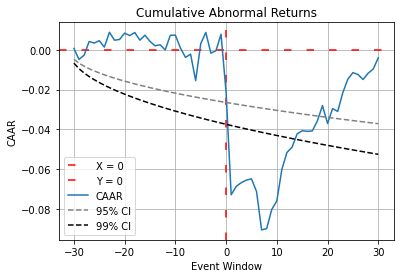

In [ ]:

plt.axvline(x=0, color='r', linestyle=(0,(5,10)), label='X = 0')# plot dashed line for x=0
plt.axhline(y=0, color='r', linestyle=(0,(5,10)), label='Y = 0')# plot dashed line for y=0
# plt.scatter(aar.index.values,aar['AAR'],s=30,label='AAR')
# plt.plot(aar.index.values,aar['AAR'],linestyle='solid',linewidth=3)
# plt.scatter(aar.index.values,caar['CAAR'],s=30,label='CAAR')
plt.plot(caar.index.values,caar['CAAR'],linewidth=1.5, label='CAAR')#plots caar values 
plt.plot(caar.index.values,caar['95% CI'],linewidth=1.5, linestyle='dashed', color='grey', label='95% CI') # plots 95% CI
plt.plot(caar.index.values,caar['99% CI'],linewidth=1.5, linestyle='dashed', color='black', label='99% CI')# plots 95% CI
plt.legend(fancybox=True) # fancybox for index
plt.xlabel("Event Window") # label x axis
plt.ylabel("CAAR") # label y axis
plt.title('Cumulative Abnormal Returns') # label table
plt.grid() # add grid to table
plt.show()